In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset (Parquet format)
df = pd.read_parquet('../results/removed_outliers.parquet')

In [3]:
print(df.isnull().sum())
print(len(df))
df = df.dropna()
print(len(df))

c_vin                           0
body_construction_start_date    0
derivate                        0
c_mileage                       0
c_chargingtype                  0
                               ..
is_weekend                      0
trip_count_per_weekday          0
mean_consumption                0
mean_duration                   0
mean_dep_time                   0
Length: 78, dtype: int64
8637446
4577305


In [31]:
# Display first few rows
print(df.head())

   c_realstartsoc  weekday_numerical  is_weekend  mean_consumption  \
0             7.0                  5           0         41.688312   
1            16.0                  1           0         41.688312   
2            65.0                  1           0         41.688312   
3            30.0                  7           0         41.688312   
4            66.0                  7           0         41.688312   

   mean_duration  start_hour  start_day  latitude  longitude  is_home_spot  \
0   12463.805195          15         16    51.828      6.629         False   
1   12463.805195           8         19    51.828      6.629         False   
2   12463.805195          16         19    51.828      6.629         False   
3   12463.805195          17         15    51.858      6.631          True   
4   12463.805195           9         22    51.858      6.631          True   

   is_location_one  delta_soc_real  plugin_duration_hr  
0            False             8.0            0.66666

In [ ]:
a = df.iloc[100]
print(a.to_string())

In [6]:
features = ['c_realstartsoc', 'weekday_numerical', 'is_weekend',
            'mean_consumption', 'mean_duration',
            'start_hour', 'start_day', 'latitude', 'longitude', 'is_home_spot',
            'is_location_one', 'delta_soc_real', 'plugin_duration_hr']

df = df[features]

In [43]:
# df = df.astype(float)
df['mean_duration'] = df['mean_duration']/3600
# df['is_weekend'] = df['is_weekend'].astype(bool)

df.dtypes

c_realstartsoc        float64
weekday_numerical       Int64
is_weekend               bool
mean_consumption      float64
mean_duration         Float64
start_hour              Int64
start_day               Int64
latitude              float64
longitude             float64
is_home_spot             bool
is_location_one          bool
delta_soc_real        float64
plugin_duration_hr    float64
dtype: object

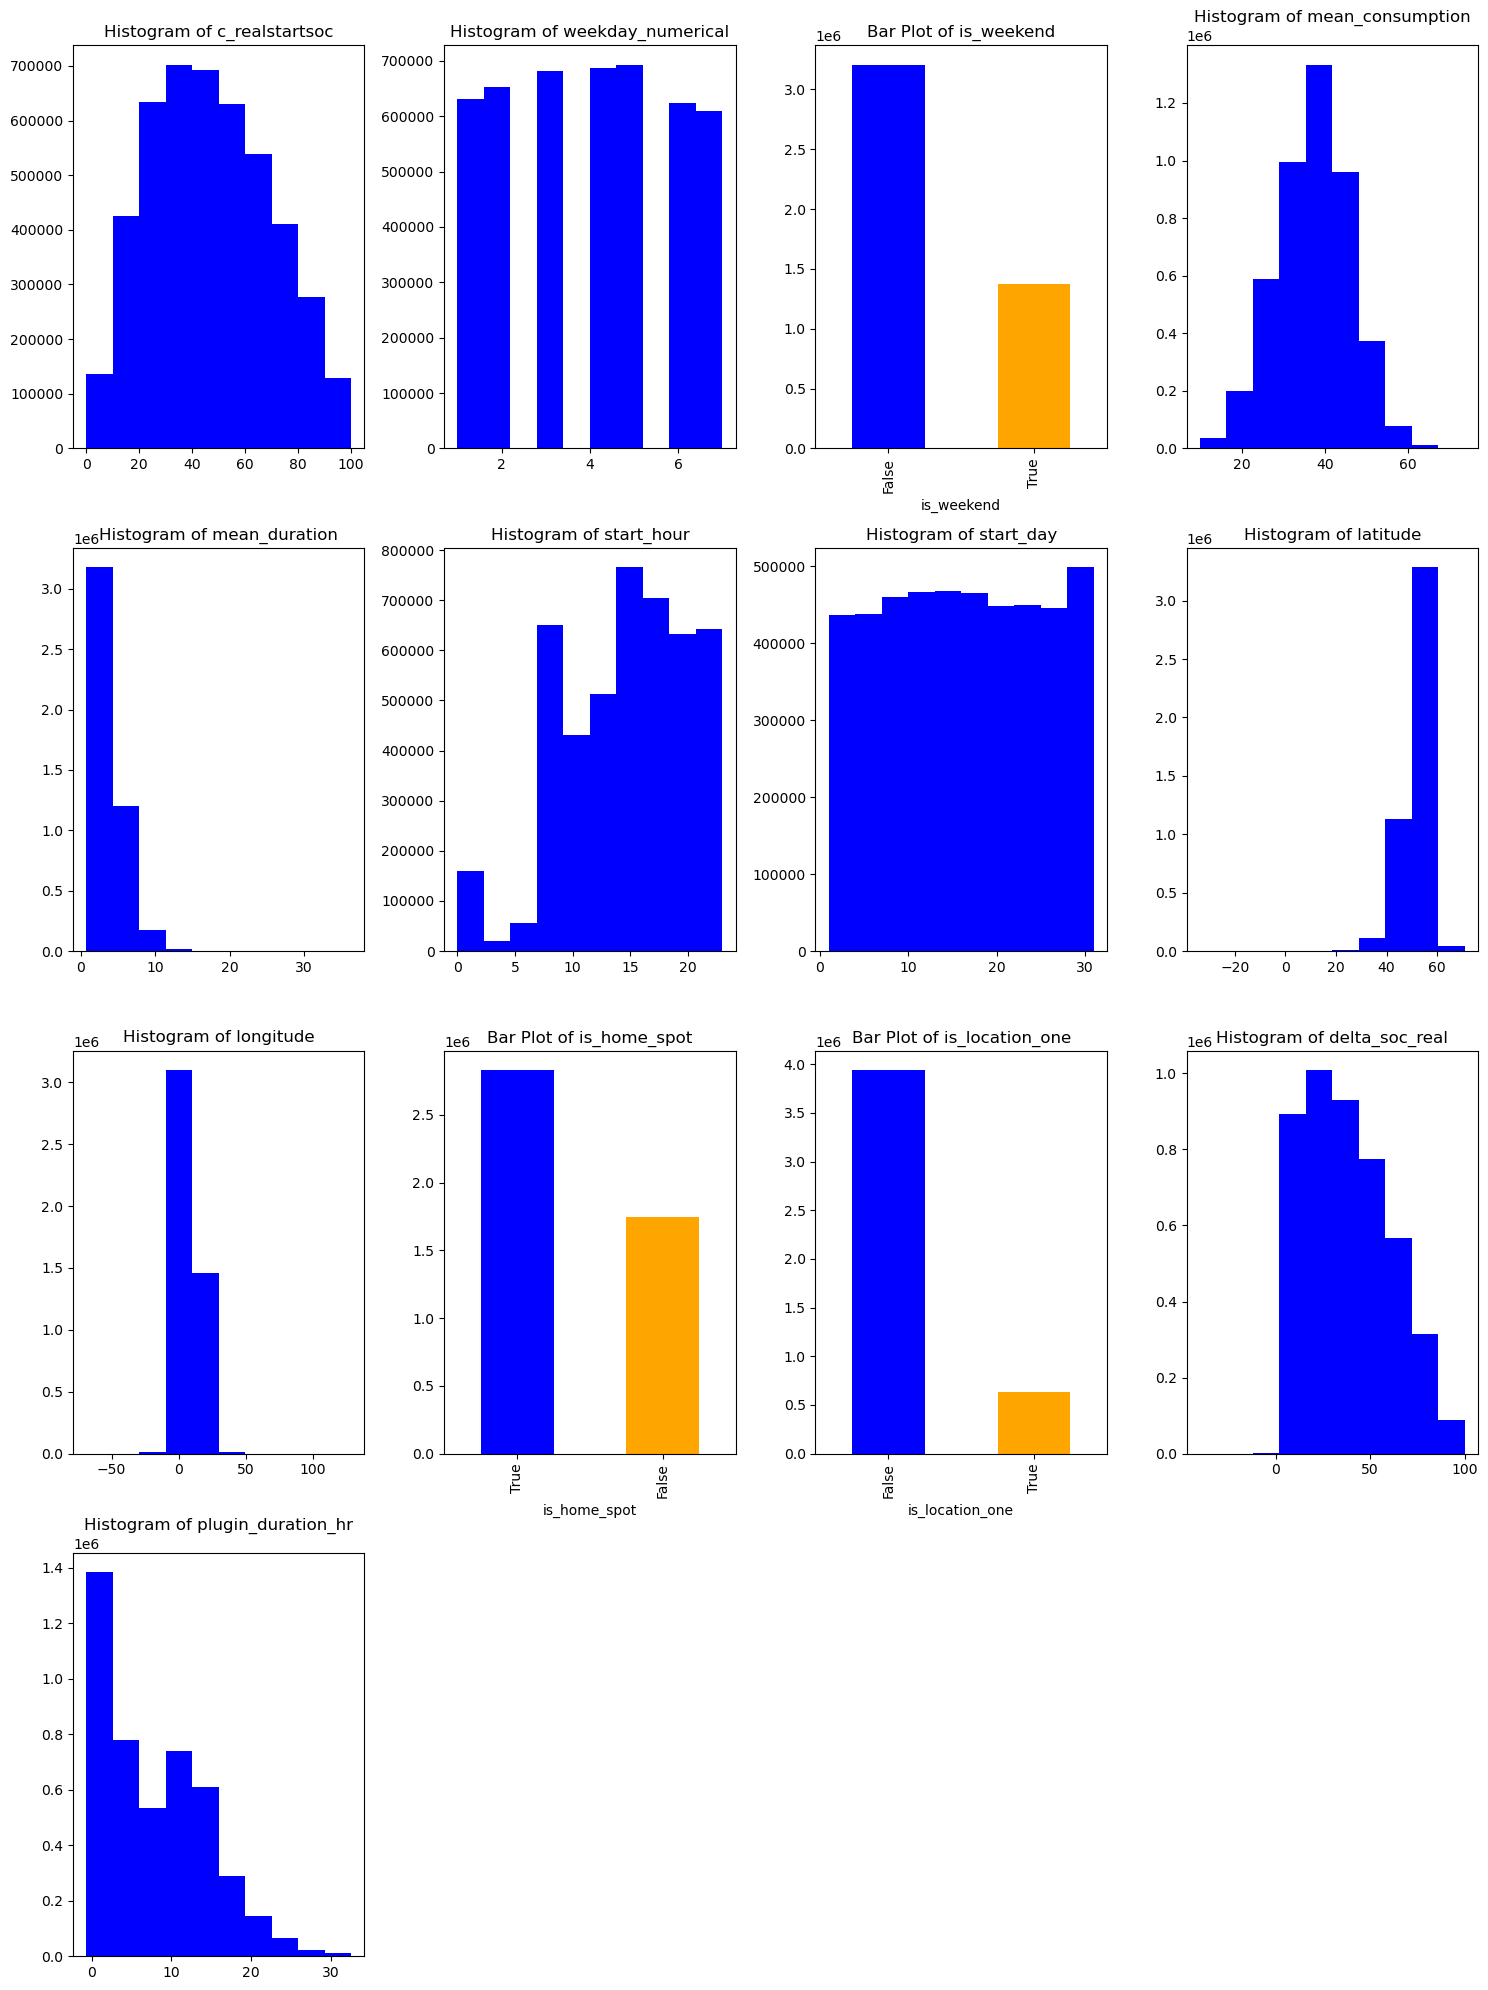

In [53]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_features(df):
    num_cols = len(df.columns)
    n_cols = 4
    n_rows = (num_cols // n_cols) + (num_cols % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() 
    for i, column in enumerate(df.columns):
        ax = axes[i]
        if pd.api.types.is_float_dtype(df[column]) or pd.api.types.is_integer_dtype(df[column]):
            ax.hist(df[column], histtype='bar', color='blue')
            ax.set_title(f"Histogram of {column}")
        elif pd.api.types.is_bool_dtype(df[column]):
            df[column].value_counts().plot(kind='bar', ax=ax, color=['blue', 'orange'])
            ax.set_title(f"Bar Plot of {column}")
            ax.set_xlabel(column)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.savefig("features.png", dpi=300)
    plt.show()

plot_features(df)

In [6]:
# Basic statistics
print(df.describe())

       c_realstartsoc  weekday_numerical  is_weekend  mean_consumption  \
count    8.637446e+06          8637446.0   8637446.0      8.637446e+06   
mean     4.746668e+01            3.91545         0.0      3.707736e+01   
std      2.248763e+01           1.950495         0.0      8.885676e+00   
min      0.000000e+00                1.0         0.0     -2.000000e+00   
25%      3.000000e+01                2.0         0.0      3.113830e+01   
50%      4.600000e+01                4.0         0.0      3.743655e+01   
75%      6.400000e+01                6.0         0.0      4.311576e+01   
max      1.000000e+02                7.0         0.0      8.703390e+01   

       mean_duration   mean_dep_time  start_hour  start_day      latitude  \
count      8637446.0       8637446.0   8637446.0  8637446.0  8.631511e+06   
mean    13981.942131     13964.31186   14.067354  15.691328  5.090616e+01   
std      6285.965188      7720.73946    5.301698   8.741359  4.431101e+00   
min           1350.0     

In [7]:
# Missing values
print(df.isnull().sum())

c_realstartsoc           0
weekday_numerical        0
is_weekend               0
mean_consumption         0
mean_duration            0
mean_dep_time            0
start_hour               0
start_day                0
latitude              5935
longitude             5930
is_home_spot             0
is_location_one          0
delta_soc_real           0
plugin_duration_hr       0
dtype: int64


In [14]:
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)
# df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

In [15]:
# df_scaled

,c_realstartsoc,weekday_numerical,is_weekend,mean_consumption,mean_duration,mean_dep_time,start_hour,latitude,longitude,is_home_spot,is_location_one,delta_soc_real,plugin_duration_hr
0,-1.799509,0.556038,0.0,0.518919,-0.241512,0.048169,0.175915,0.208038,-0.192459,-1.002372,-0.522232,-1.312610,-1.072259
1,-1.399289,-1.494723,0.0,0.518919,-0.241512,-0.045391,-1.144417,0.208038,-0.192459,-1.002372,-0.522232,0.627264,-0.140779
2,0.779687,-1.494723,0.0,0.518919,-0.241512,-0.045391,0.364533,0.208038,-0.192459,-1.002372,-0.522232,-0.139663,1.935089
3,-0.776724,1.581419,0.0,0.518919,-0.241512,-0.115383,0.553152,0.214808,-0.192153,0.997633,-0.522232,1.439304,1.003610
4,0.824156,1.581419,0.0,0.518919,-0.241512,-0.115383,-0.955798,0.214808,-0.192153,0.997633,-0.522232,-0.139663,-0.699667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637441,1.135439,0.043348,0.0,-0.110414,-0.502994,-0.453715,-1.144417,0.267617,-0.417844,-1.002372,1.914857,-0.455456,-0.539985
8637442,1.090970,-1.494723,0.0,-0.110414,-0.502994,0.030940,-1.144417,0.267617,-0.417844,-1.002372,1.914857,-0.455456,0.285040
8637443,1.935879,-0.982032,0.0,-0.110414,-0.502994,-0.292507,-1.144417,0.267617,-0.417844,-1.002372,1.914857,-1.312610,-0.593212
8637444,1.669066,-0.982032,0.0,-0.110414,-0.502994,-0.292507,-0.201323,0.267617,-0.538264,-1.002372,-0.522232,-1.267496,-0.846619


(array([834341., 842665., 866644., 861890., 873407., 870189., 849099.,
        843746., 834919., 960546.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

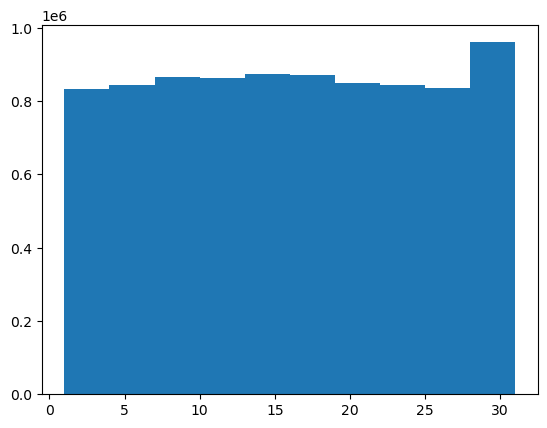

In [5]:
plt.hist(df['start_day'],histtype='bar')

(array([1243466., 1250651.,       0., 1293574.,       0., 1310197.,
        1348711.,       0., 1126277., 1064570.]),
 array([-1.49472276, -1.18710858, -0.8794944 , -0.57188022, -0.26426604,
         0.04334814,  0.35096232,  0.6585765 ,  0.96619068,  1.27380486,
         1.58141904]),
 <BarContainer object of 10 artists>)

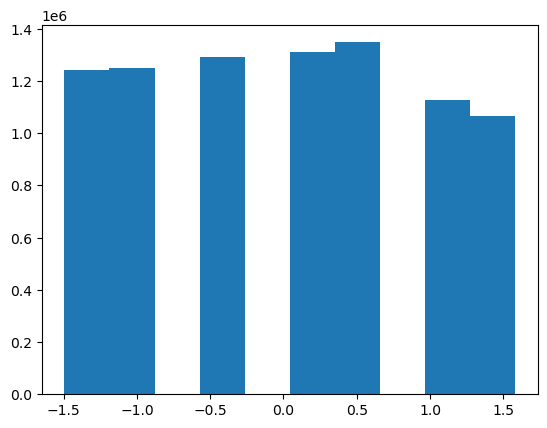

In [18]:
plt.hist(df_scaled['weekday_numerical'],histtype='bar')

(array([7.300000e+01, 7.422700e+04, 6.939400e+05, 2.149171e+06,
        3.350688e+06, 1.961698e+06, 3.674520e+05, 3.898200e+04,
        1.159000e+03, 5.600000e+01]),
 array([-4.39779333, -3.39579976, -2.39380618, -1.39181261, -0.38981903,
         0.61217454,  1.61416811,  2.61616169,  3.61815526,  4.62014884,
         5.62214241]),
 <BarContainer object of 10 artists>)

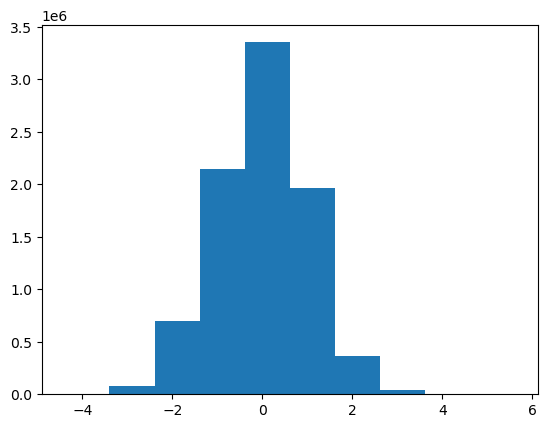

In [19]:
plt.hist(df_scaled['mean_consumption'],histtype='bar')

(array([2702104., 1704037., 1079893., 1273401.,  982798.,  479542.,
         248001.,  112798.,   37018.,   17854.]),
 array([-0.66666667,  2.65633333,  5.97933333,  9.30233333, 12.62533333,
        15.94833333, 19.27133333, 22.59433333, 25.91733333, 29.24033333,
        32.56333333]),
 <BarContainer object of 10 artists>)

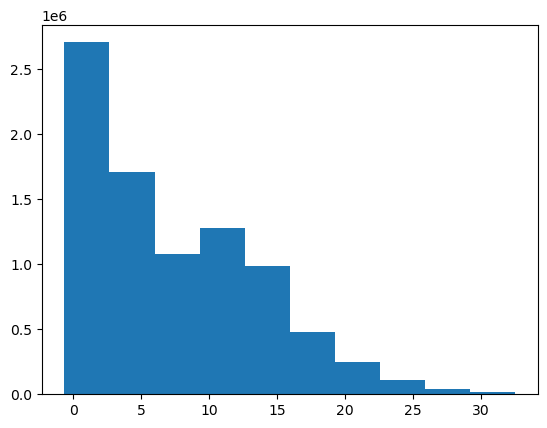

In [21]:
plt.hist(df['plugin_duration_hr'],histtype='bar')

(array([5.000000e+00, 2.200000e+01, 9.100000e+01, 1.163850e+06,
        2.093510e+06, 1.946798e+06, 1.494446e+06, 1.162232e+06,
        6.199000e+05, 1.565920e+05]),
 array([-3.79384373, -3.13067756, -2.46751139, -1.80434522, -1.14117905,
        -0.47801288,  0.18515329,  0.84831946,  1.51148563,  2.1746518 ,
         2.83781797]),
 <BarContainer object of 10 artists>)

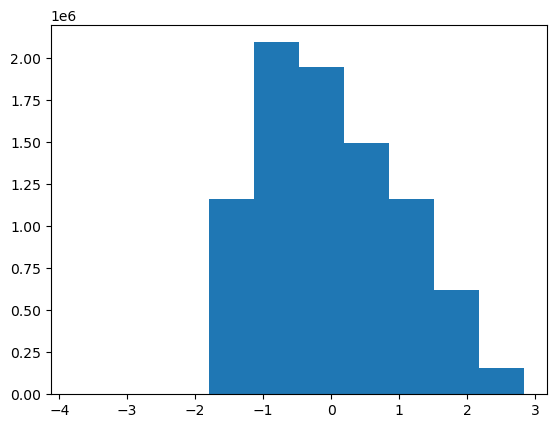

In [22]:
plt.hist(df_scaled['delta_soc_real'],histtype='bar')

(array([ 252254.,   32754.,  149881., 1596397.,  877139., 1012778.,
        1426392., 1205650., 1047708., 1036493.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

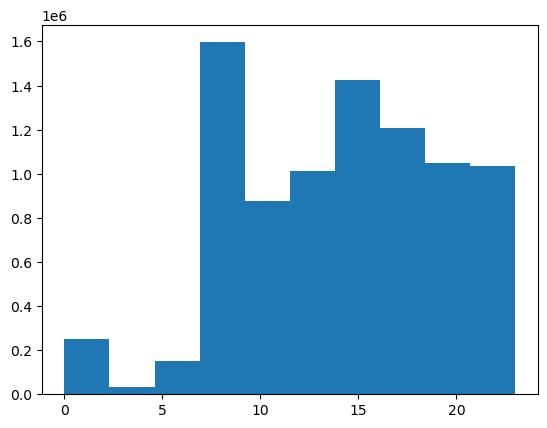

In [14]:
plt.hist(df['start_hour'],histtype='bar')

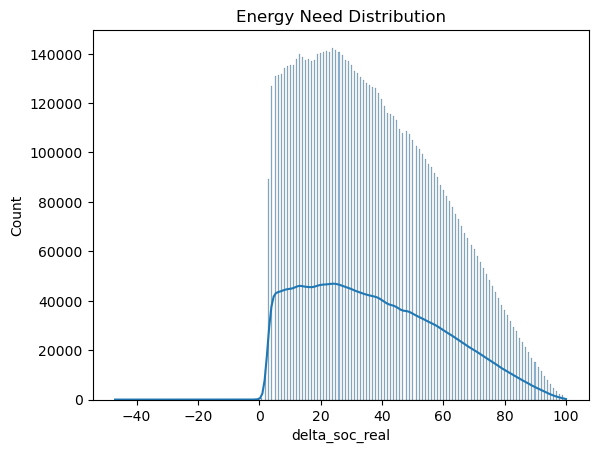

In [4]:
# Visualize distribution of the target variables (e.g., Energy Need, Departure Time)
sns.histplot(df['delta_soc_real'], kde=True)
plt.title("Energy Need Distribution")
plt.show()

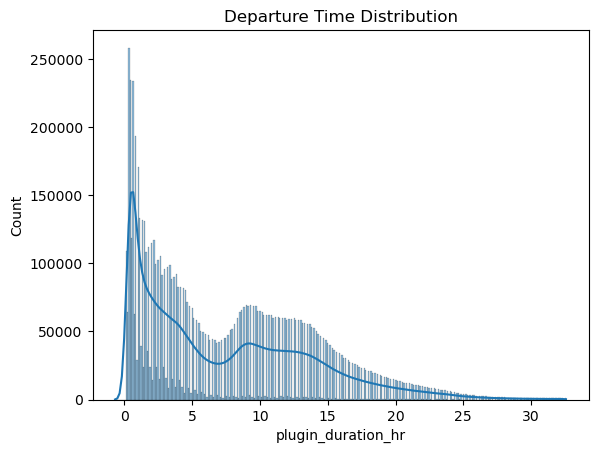

In [5]:
sns.histplot(df['plugin_duration_hr'], kde=True)
plt.title("Departure Time Distribution")
plt.show()

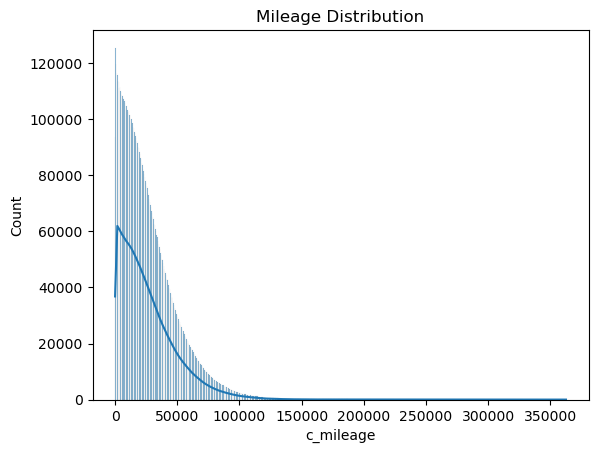

In [3]:
sns.histplot(df['c_mileage'], kde=True)
plt.title("Mileage Distribution")
plt.show()

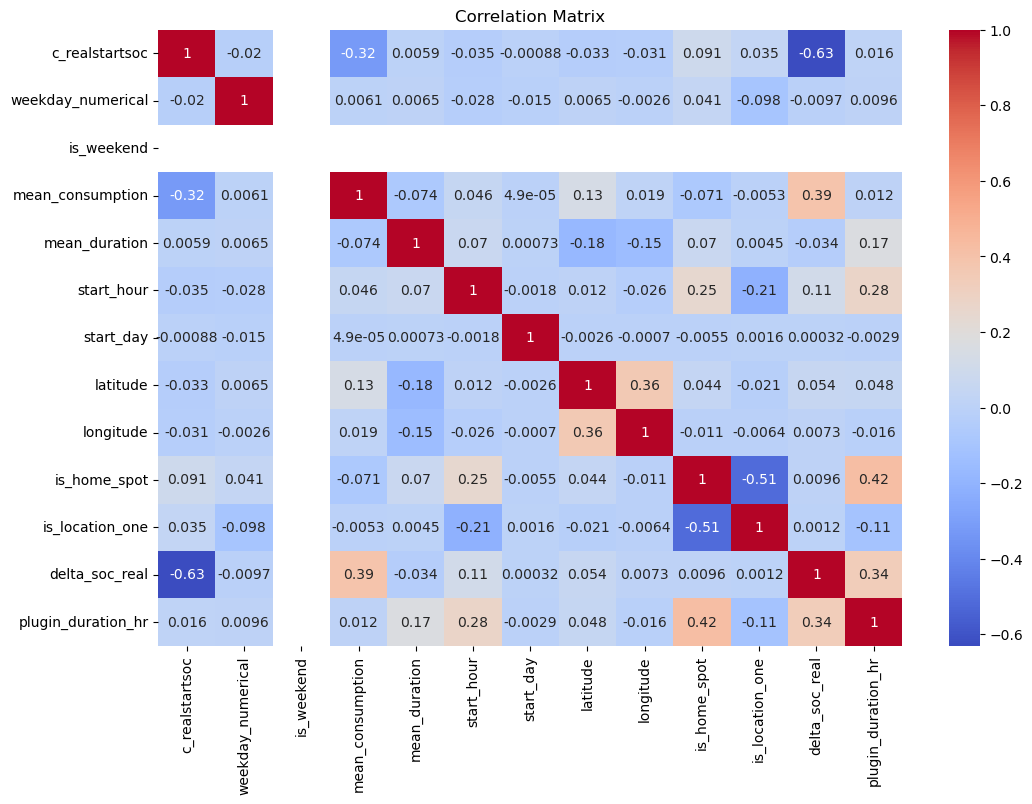

In [7]:
# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()